In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/mujahidashraf/data/refs/heads/main/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.drop([ "CustomerID"], axis=1, inplace=True)

In [ ]:
df_with_dummies = pd.get_dummies(data, columns=['Gender'])
df_with_dummies.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


In [ ]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(df_with_dummies)
clustering


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
clustering.labels_

array([195, 131, 103, 197, 189, 162, 116, 135, 153, 128, 199, 172, 125,
       186, 132, 178, 183, 147, 157, 179, 151, 139, 143, 108, 127, 112,
       155, 123, 156, 119, 118, 110,  63, 114, 129, 124, 173, 163, 175,
       171, 100, 191, 111, 174, 121, 184, 144,  65, 196, 150, 182, 138,
        71, 133, 164, 136, 181, 134, 130, 142,  91, 154, 170, 177, 169,
        99,  64,  85, 113, 107, 104,  66, 101,  61, 165, 176, 137, 126,
        56,  86, 115,  57,  67, 185,  88,  53, 166, 148, 120, 160, 149,
       140, 192,  31, 193,  87, 122, 109,  62,  77,  97, 190, 198,  76,
        73,  55, 194, 141, 146, 167, 180,  60,  89,  42,  96,  74,  36,
       188,  32, 105,  68, 106,  15,  81, 145,  59,  27,  51, 117,  98,
       168, 159,  72,  94, 152,  83,  70,  92,  75,  82,  69, 161,  80,
       102,  50,  54,  58,  95,  84,  79,  90,  44,  35,  29, 158,  34,
       187,  37,  49,  28,  39,  93,  47,  33,  30,  40,  48,  19,  46,
        41,  78,  16,  38,  24,  52,  26,  17,  45,  22,  13,  2

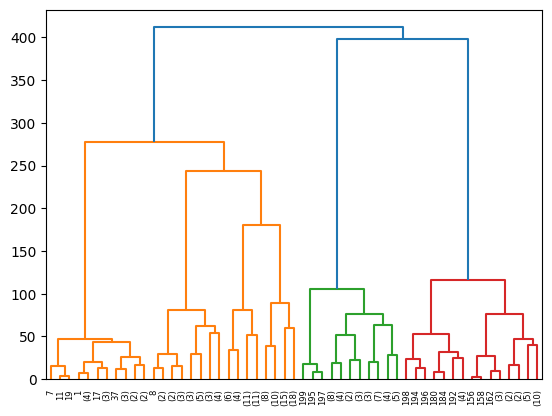

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



#plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=5)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()